In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests as grangertest
from scipy.spatial.distance import euclidean
from scipy.signal import find_peaks
import math

### Load data

In [2]:
file_name = '../data/wifi_imu_pairs/imu_v_test8.csv'# IMU
df = pd.read_csv(file_name) # read into a pandas dataframe

In [3]:
file_name1 = '../data/wifi_imu_pairs/wifi_v_test8.csv' # WiFi Data
df1 = pd.read_csv(file_name1)

### Pre-process data

In [4]:
imu_data = df.to_numpy()
wifi_data = df1.to_numpy()
wifi_data = wifi_data[:,0]

In [5]:
x = imu_data[:,1] # readings along x axis
y = imu_data[:,2] # readings along y axis
z = imu_data[:,3] # readings along z axis

In [6]:
wifi_size = np.size(wifi_data)
imu_size = np.size(x)

In [7]:
len1 = range(len(x))
len2 = range(len(wifi_data))

In [8]:
x_new = []
y_new = []
z_new = []
prev = 0
i = 4
while i < len(x):
    x_new.append(np.mean(x[prev:i]))
    y_new.append(np.mean(y[prev:i]))
    z_new.append(np.mean(z[prev:i]))
    prev = i
    i = i + 5

In [9]:
if len(x_new) > len(wifi_data):
    x_new = x_new[0:len(wifi_data)]
    y_new = y_new[0:len(wifi_data)]
    z_new = z_new[0:len(wifi_data)]
elif len(wifi_data) > len(x_new):
    wifi_data = wifi_data[0:len(x_new)]

### Peak Suppression

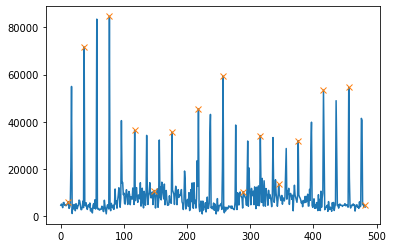

In [10]:
plt.plot(wifi_data)
peaks, _ = find_peaks(wifi_data, distance=25)
plt.plot(peaks, wifi_data[peaks], "x")
plt.show()

In [11]:
for pik in range(0,len(peaks)-1):
    wifi_data[peaks[pik]] = (wifi_data[peaks[pik]+1] + wifi_data[peaks[pik]-1])/2

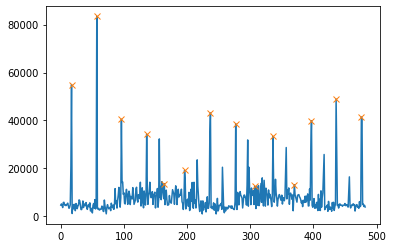

In [12]:
plt.plot(wifi_data)
peaks, _ = find_peaks(wifi_data, distance=25)
plt.plot(peaks, wifi_data[peaks], "x")
plt.show()

In [13]:
for pik in range(0,len(peaks)-1):
    wifi_data[peaks[pik]] = (wifi_data[peaks[pik]+1] + wifi_data[peaks[pik]-1])/2

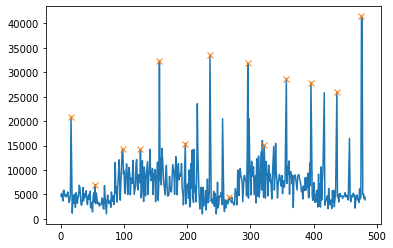

In [14]:
plt.plot(wifi_data)
peaks, _ = find_peaks(wifi_data, distance=25)
plt.plot(peaks, wifi_data[peaks], "x")
plt.show()

In [15]:
for pik in range(0,len(peaks)-1):
    wifi_data[peaks[pik]] = (wifi_data[peaks[pik]+1] + wifi_data[peaks[pik]-1])/2

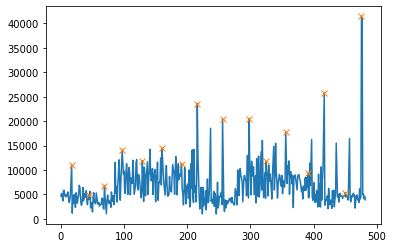

In [16]:
plt.plot(wifi_data)
peaks, _ = find_peaks(wifi_data, distance=25)
plt.plot(peaks, wifi_data[peaks], "x")
plt.show()

In [17]:
np.mean(wifi_data)

6706.293995859213

### To avoid false-positives

#### Naive approach used to filter out some corner-cases in the granger causality package

In [18]:
wifi_dataa = []
for i in range(0,len(wifi_data)):
    if wifi_data[i] > np.mean(wifi_data):
        wifi_dataa.append(1)
    else:
        wifi_dataa.append(0)

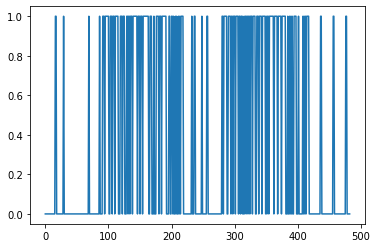

In [19]:
plt.plot(wifi_dataa)

In [20]:
def count_one(arr):
    count = 0
    for i in range(0,len(arr)):
        if arr[i] == 1:
            count = count + 1
    return(count)

In [21]:
wifi_dataa1 = np.copy(wifi_dataa)
wifi_dataa2 = np.copy(wifi_dataa)

In [22]:
for i in range(2,len(wifi_dataa)):
    start = i - 2
    stop = i + 2
    if count_one(wifi_dataa[start:stop]) >= 2:
        wifi_dataa1[i] = 1
    else:
        wifi_dataa1[i] = 0

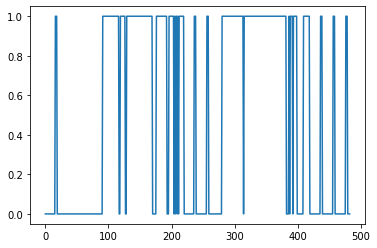

In [23]:
plt.plot(wifi_dataa1)

In [24]:
for i in range(4,len(wifi_dataa1)):
    start = i - 4
    stop = i + 4
    if count_one(wifi_dataa1[start:stop]) >= 5:
        wifi_dataa2[i] = 1
    else:
        wifi_dataa2[i] = 0

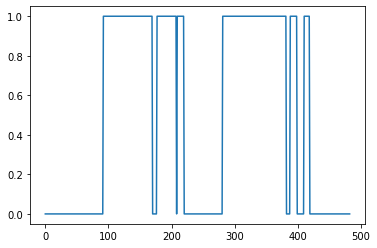

In [25]:
plt.plot(wifi_dataa2)

In [26]:
x_neww = []
x_new1 = np.copy(x_new)
for i in range(0,len(x_new)):
    if x_new[i] < 5 and x_new[i] > -5:
        x_neww.append(0)
    else:
        x_neww.append(1)

In [27]:
for i in range(2,len(x_neww)):
    start = i - 2
    stop = i + 2
    if count_one(x_neww[start:stop]) >= 2:
        x_new1[i] = 1
    else:
        x_new1[i] = 0

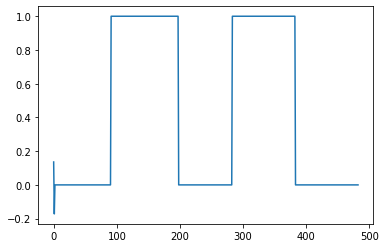

In [28]:
plt.plot(x_new1)

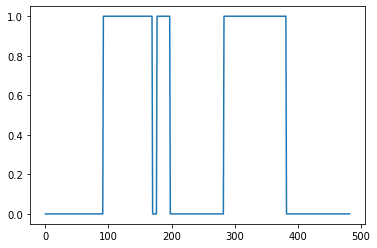

In [29]:
plt.plot(x_new1*wifi_dataa2)

In [30]:
wifi_dataa = np.asarray(wifi_dataa2)

In [31]:
x_new = np.asarray(x_new)
y_new = np.asarray(y_new)
z_new = np.asarray(z_new)

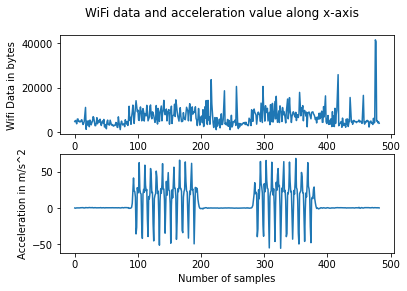

In [32]:
fig, axs = plt.subplots(2)
fig.suptitle('WiFi data and acceleration value along x-axis')
axs[0].plot(wifi_data)
axs[1].set_xlabel('Number of samples')
axs[1].set_ylabel('Acceleration in m/s^2')
axs[0].set_ylabel('Wifi Data in bytes')
axs[1].plot(x_new)

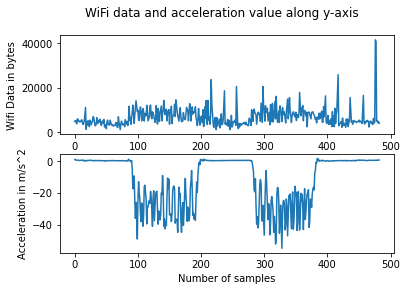

In [33]:
fig, axs = plt.subplots(2)
fig.suptitle('WiFi data and acceleration value along y-axis')
axs[0].plot(wifi_data)
axs[1].set_xlabel('Number of samples')
axs[1].set_ylabel('Acceleration in m/s^2')
axs[0].set_ylabel('Wifi Data in bytes')
axs[1].plot(y_new)

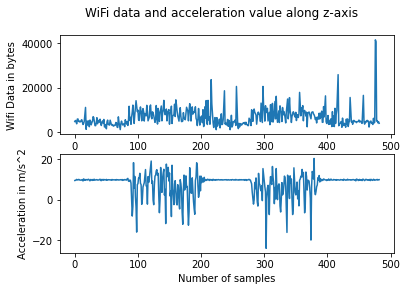

In [34]:
fig, axs = plt.subplots(2)
fig.suptitle('WiFi data and acceleration value along z-axis')
axs[0].plot(wifi_data)
axs[1].set_xlabel('Number of samples')
axs[1].set_ylabel('Acceleration in m/s^2')
axs[0].set_ylabel('Wifi Data in bytes')
axs[1].plot(z_new)

In [35]:
# Normalize the data
wifi_data_norm = wifi_data
x_new_norm = x_new
wifi_data_norm = wifi_data_norm - wifi_data_norm.mean(axis=0)
wifi_data_norm = wifi_data_norm / np.abs(wifi_data_norm).max(axis=0)
x_new_norm = x_new_norm - x_new_norm.mean(axis=0)
x_new_norm = x_new_norm / np.abs(x_new_norm).max(axis=0)

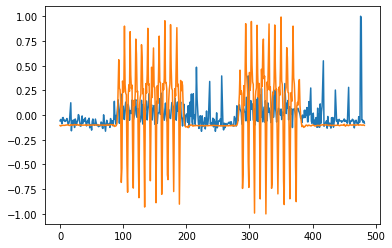

In [36]:
plt.plot(wifi_data_norm)
plt.plot(x_new_norm)
plt.show()

In [37]:
# plt.plot(wifi_data)
# plt.axhline(y=np.mean(wifi_data))
# plt.show()

In [38]:
combined_axes = np.sqrt(x_new**2 + y_new**2 + z_new**2)
com_norm = combined_axes
com_norm = com_norm - com_norm.mean(axis=0)
com_norm = com_norm / np.abs(com_norm).max(axis=0)

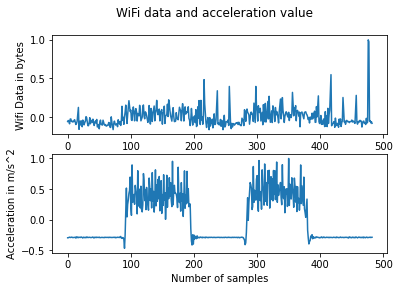

In [39]:
fig, axs = plt.subplots(2)
fig.suptitle('WiFi data and acceleration value')
axs[0].plot(wifi_data_norm)
axs[1].set_xlabel('Number of samples')
axs[1].set_ylabel('Acceleration in m/s^2')
axs[0].set_ylabel('Wifi Data in bytes')
axs[1].plot(com_norm)
# fig.savefig("foo.pdf", bbox_inches='tight')

### Run Granger tests

In [40]:
granger_1 = np.column_stack((wifi_dataa.T, x_new.T))
granger_2 = np.column_stack((wifi_dataa.T, y_new.T))
granger_3 = np.column_stack((wifi_dataa.T, z_new.T))
granger_4 = np.column_stack((wifi_dataa.T, combined_axes.T))

In [41]:
max1_lag = 20

In [42]:
granger_test_result_1 = grangertest(granger_1, maxlag=max1_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7460  , p=0.1870  , df_denom=479, df_num=1
ssr based chi2 test:   chi2=1.7569  , p=0.1850  , df=1
likelihood ratio test: chi2=1.7537  , p=0.1854  , df=1
parameter F test:         F=1.7460  , p=0.1870  , df_denom=479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3053  , p=0.2721  , df_denom=476, df_num=2
ssr based chi2 test:   chi2=2.6380  , p=0.2674  , df=2
likelihood ratio test: chi2=2.6308  , p=0.2684  , df=2
parameter F test:         F=1.3053  , p=0.2721  , df_denom=476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8648  , p=0.4593  , df_denom=473, df_num=3
ssr based chi2 test:   chi2=2.6327  , p=0.4518  , df=3
likelihood ratio test: chi2=2.6255  , p=0.4530  , df=3
parameter F test:         F=0.8648  , p=0.4593  , df_denom=473, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6460  , p=0.6299  

In [43]:
optimal_lag_1 = -1
p_test = 1.0
for key in granger_test_result_1.keys():
    _p_test_ = granger_test_result_1[key][0]['params_ftest'][1]
    if _p_test_ < p_test and _p_test_ < 0.08:
        p_test = _p_test_
        optimal_lag_1 = key

In [44]:
optimal_lag_1

20

In [45]:
granger_test_result_2 = grangertest(granger_2, maxlag=max1_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.0578  , p=0.0028  , df_denom=479, df_num=1
ssr based chi2 test:   chi2=9.1145  , p=0.0025  , df=1
likelihood ratio test: chi2=9.0294  , p=0.0027  , df=1
parameter F test:         F=9.0578  , p=0.0028  , df_denom=479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.0713  , p=0.0177  , df_denom=476, df_num=2
ssr based chi2 test:   chi2=8.2281  , p=0.0163  , df=2
likelihood ratio test: chi2=8.1585  , p=0.0169  , df=2
parameter F test:         F=4.0713  , p=0.0177  , df_denom=476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.7720  , p=0.0107  , df_denom=473, df_num=3
ssr based chi2 test:   chi2=11.4833 , p=0.0094  , df=3
likelihood ratio test: chi2=11.3481 , p=0.0100  , df=3
parameter F test:         F=3.7720  , p=0.0107  , df_denom=473, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4068  , p=0.0092  

In [46]:
optimal_lag_2 = -1
p_test = 1.0
for key in granger_test_result_2.keys():
    _p_test_ = granger_test_result_2[key][0]['params_ftest'][1]
    if _p_test_ < p_test and _p_test_ < 0.08:
        p_test = _p_test_
        optimal_lag_2 = key

In [47]:
optimal_lag_2

1

In [48]:
granger_test_result_3 = grangertest(granger_3, maxlag=max1_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5184  , p=0.2185  , df_denom=479, df_num=1
ssr based chi2 test:   chi2=1.5279  , p=0.2164  , df=1
likelihood ratio test: chi2=1.5255  , p=0.2168  , df=1
parameter F test:         F=1.5184  , p=0.2185  , df_denom=479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1730  , p=0.3103  , df_denom=476, df_num=2
ssr based chi2 test:   chi2=2.3707  , p=0.3056  , df=2
likelihood ratio test: chi2=2.3649  , p=0.3065  , df=2
parameter F test:         F=1.1730  , p=0.3103  , df_denom=476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9763  , p=0.1167  , df_denom=473, df_num=3
ssr based chi2 test:   chi2=6.0167  , p=0.1108  , df=3
likelihood ratio test: chi2=5.9793  , p=0.1126  , df=3
parameter F test:         F=1.9763  , p=0.1167  , df_denom=473, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5193  , p=0.1954  

In [49]:
optimal_lag_3 = -1
p_test = 1.0
for key in granger_test_result_3.keys():
    _p_test_ = granger_test_result_3[key][0]['params_ftest'][1]
    if _p_test_ < p_test and _p_test_ < 0.08:
        p_test = _p_test_
        optimal_lag_3 = key

In [50]:
optimal_lag_3

6

In [51]:
granger_test_result_4 = grangertest(granger_4, maxlag=max1_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.6641 , p=0.0004  , df_denom=479, df_num=1
ssr based chi2 test:   chi2=12.7434 , p=0.0004  , df=1
likelihood ratio test: chi2=12.5778 , p=0.0004  , df=1
parameter F test:         F=12.6641 , p=0.0004  , df_denom=479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.5185  , p=0.0006  , df_denom=476, df_num=2
ssr based chi2 test:   chi2=15.1950 , p=0.0005  , df=2
likelihood ratio test: chi2=14.9599 , p=0.0006  , df=2
parameter F test:         F=7.5185  , p=0.0006  , df_denom=476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.2277  , p=0.0015  , df_denom=473, df_num=3
ssr based chi2 test:   chi2=15.9153 , p=0.0012  , df=3
likelihood ratio test: chi2=15.6572 , p=0.0013  , df=3
parameter F test:         F=5.2277  , p=0.0015  , df_denom=473, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.3465  , p=0.0018  

In [52]:
optimal_lag_4 = -1
p_test = 1.0
for key in granger_test_result_4.keys():
    _p_test_ = granger_test_result_4[key][0]['params_ftest'][1]
    if _p_test_ < p_test and _p_test_ < 0.08:
        p_test = _p_test_
        optimal_lag_4 = key

In [53]:
optimal_lag_4

1

### Use both conditions to check if there is a cause-and-effect relationship or not

In [54]:
flag_granger = -1
flag_overlap = -1

In [55]:
if optimal_lag_1 != -1 or optimal_lag_2 != -1 or optimal_lag_3 != -1 or optimal_lag_4 != -1:
    print("Yes")
    flag_granger = 1
else:
    print("No")
    flag_granger = 0

Yes


In [56]:
if(count_one(x_new1*wifi_dataa2)/count_one(x_new1)) > 0.6:
    print("Yes")
    flag_overlap = 1
else:
    print("No")
    flag_overlap = 0

Yes


In [57]:
if flag_overlap and flag_granger:
    print('Cause and effect relationship is detected. Snooping sensor found!')
else:
    print('Cause and effect relationship is not detected. Try with a different device.')

Cause and effect relationship is detected. Snooping sensor found!
